# Coswara-Data Metadata Details
> Some bar plots and histograms.

- toc: false 
- badges: true
- comments: true
- categories: [coswara]
- image: images/chart-preview.png
- author: Neeraj Sharma

The COSWARA database is created by crowdsourcing sound samples. In this post we visualize the crowd (or participant) distribution along certain dimensions collected in the metadata questionnaire. The metadata and sound files are publicly available in the [COSWARA-DATA](https://github.com/iiscleap/Coswara-Data) github repository. In the below code we will read a CSV file containing the metadata of all participants (as of 13 Jan 2021), and plot the metadata distributions.

## Step 1:
Load the CSVs

In [1]:
#collapse
# import some packages
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 10, 2020
@author: neeks, cmu
"""
import numpy as np
from os import path
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import librosa
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
sns.set_style("white")
sns.set_style("ticks")

# urls for csvs
url_metadata_annotations = 'https://raw.githubusercontent.com/iiscleap/Coswara-Exp/master/Annotated_v2/Annotated_v2_ans.csv'
url_metadata_recordings = 'https://raw.githubusercontent.com/iiscleap/Coswara-Data/master/combined_data.csv'

path_audio_data = '/Volumes/BackupNeeks/dBase/coswaradBase/annotatedFiles/audio_19Oct2020/'
path_store_figure = './figures/'
fig_save = 0

# load the csvs
df_2 = pd.read_csv(url_metadata_recordings) # recording metadata

## Step 2:
Visuaize the gender distribution

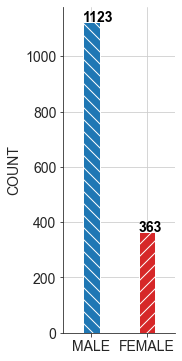

In [2]:
#collapse
DF = df_2.copy()
# plot gender
gender_labels = DF['g'].unique()[::-1]
gender_cnt = []
for i in range(len(gender_labels)):
    gender_cnt.append(len(DF[(DF['g'] == gender_labels[i])]))# & (DF['recording']=='breathing-deep')]))

clr_1 = 'tab:blue'
clr_2 = 'tab:red'
fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,gender_cnt[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.6)
ax.bar(4,gender_cnt[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.6)

for i, v in enumerate(gender_cnt):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
plt.xticks([2,4], ['MALE','FEMALE'],rotation=0)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(1,5)
# ax.set_ylim(200,1500)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_gender.pdf", bbox_inches='tight')
plt.show()

## Step 3:
How is the age distribution?

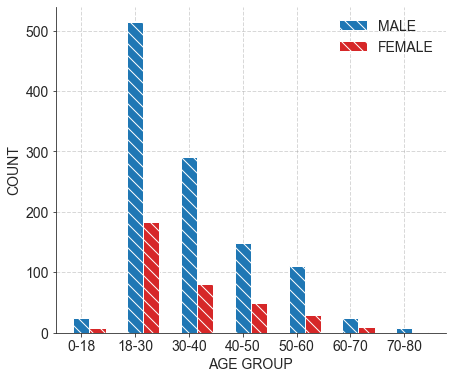

In [3]:
#collapse
# plot age
age_labels = DF['a'].unique()
age_cnt_male = []
age_cnt_female = []
for i in range(len(age_labels)):
    if age_labels[i] == 'X':
        age_labels[i] = 0
    age_cnt_male.append(len(DF[(DF['a'] == age_labels[i])  & (DF['g']=='male')]))
    age_cnt_female.append(len(DF[(DF['a'] == age_labels[i]) & (DF['g']=='female')]))

age_cnt_male = DF[(DF['g']=='male')]['a'].values
age_cnt_female = DF[(DF['g']=='female')]['a'].values

age_labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80']

age_grouped_male = []
age_grouped_female = []

for i in age_labels:
    age_grouped_male.append(len(age_cnt_male[(age_cnt_male > (int(i.split('-')[0])-1)) & \
                                        (age_cnt_male < int(i.split('-')[1]))]))
    age_grouped_female.append(len(age_cnt_female[(age_cnt_female > (int(i.split('-')[0])-1)) & \
                                        (age_cnt_female < int(i.split('-')[1]))]))
clr_1 = 'tab:blue'
clr_2 = 'tab:red'

fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(np.arange(0,len(age_labels)),age_grouped_male, align='center',alpha=1,hatch="\\\\",ecolor='black',capsize=5,color=clr_1,width=.3,label='MALE')
ax.bar(np.arange(0,len(age_labels))+.3,age_grouped_female, align='center',alpha=1,hatch="\\\\",ecolor='black',capsize=5,color=clr_2,width=.3,label='FEMALE')
ax.legend(frameon=False,loc='upper right',fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('AGE GROUP', fontsize=14)
plt.xticks(np.arange(0,len(age_labels)), age_labels,rotation=0,fontsize=14)
plt.yticks(fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_age.pdf", bbox_inches='tight')
plt.show()

## Step 4:
How many are from India and Outside?

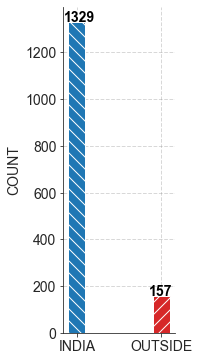

In [4]:
#collapse
# plot country
country_labels = DF['l_c'].unique()
country_cnt = []
for i in range(len(country_labels)):
    country_cnt.append(len(DF[(DF['l_c'] == country_labels[i])]))
country_cnt = np.array(country_cnt)
indx = np.argsort(country_cnt)[::-1]
country_cnt = country_cnt[indx]
country_labels = country_labels[indx]
two_categories = [country_cnt[0],np.sum(country_cnt[1:])]
two_labels = ['INDIA','OUTSIDE']

fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,two_categories[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.4)
ax.bar(4,two_categories[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.4)
plt.xticks([2,4],two_labels,rotation=0,fontsize=14)
for i, v in enumerate(two_categories):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()

## Step 5:
Which are the top 6 states from India contributing to the data?


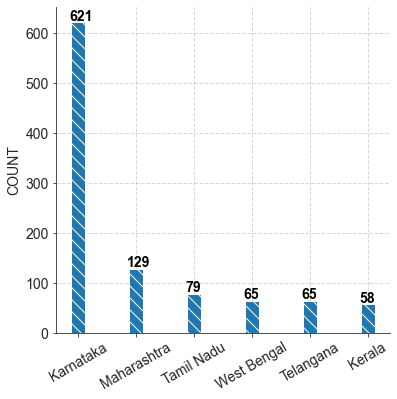

In [5]:
#collapse
# plot state
state_labels = DF['l_s'].unique()
state_cnt = []
for i in range(len(state_labels)):
    state_cnt.append(len(DF[(DF['l_s'] == state_labels[i])]))
state_cnt = np.array(state_cnt)
indx = np.argsort(state_cnt)[::-1][0:6]
state_cnt = state_cnt[indx]
state_labels = state_labels[indx]
    

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(np.arange(0,len(state_cnt)),state_cnt, align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.25)
ax.set_ylabel('COUNT',fontsize=14)
# # ax.text(1.5,-9,'MEAN',horizontalalignment='center')
plt.xticks(np.arange(0,len(state_cnt)),state_labels,rotation=30,fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(state_cnt):
    ax.text(i-.15,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_state.pdf", bbox_inches='tight')
plt.show()

## Step 6:
How is the distribution across healthy (and no COVID-19), respiratory ailments (and no COVID-19), and COVID-19 categories?


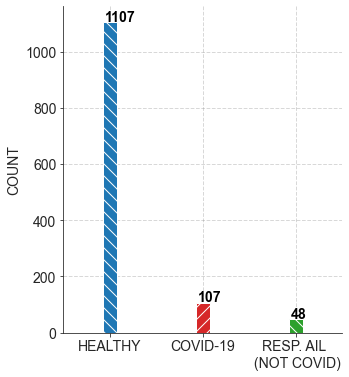

In [6]:
#collapse
##### init path to list
path_to_lists = '/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/lists/'
#####

DF_more = DF.replace('None', np.nan)
DF_more = DF.replace(np.nan, False)
DF_more['healthy'] = False
DF_more['covid'] = 0.0
DF_more['unhealthy_but_no_covid'] = False

for i in range(len(DF_more)):
    # healthy
    if (DF_more.at[i,'covid_status']=='healthy') & (DF_more.at[i,'asthma']==False) &\
    (DF_more.at[i,'cld']==False) & (DF_more.at[i,'cold']==False) &\
    (DF_more.at[i,'cough']==False) & (DF_more.at[i,'pneumonia']==False) &\
    (DF_more.at[i,'fever']==False):
        DF_more.at[i,'healthy'] = True
        
    # covid
    if (DF_more.at[i,'covid_status']=='positive_asymp'):
        DF_more.at[i,'covid'] = 1
        
    if (DF_more.at[i,'covid_status']=='positive_mild'):
        DF_more.at[i,'covid'] = 2

    if (DF_more.at[i,'covid_status']=='positive_moderate'):
        DF_more.at[i,'covid'] = 3

    # unhealthy but not covid
    if (DF_more.at[i,'covid_status']=='resp_illness_not_identified') & ((DF_more.at[i,'asthma']==True) |\
    (DF_more.at[i,'cld']==True) | (DF_more.at[i,'cold']==True) |\
    (DF_more.at[i,'cough']==True) | (DF_more.at[i,'pneumonia']==True)):
        DF_more.at[i,'unhealthy_but_no_covid'] = True
        
health_categories_cnt_all = []

# get healthy
health_categories_cnt_all.append(len(DF_more[(DF_more['healthy']==True)]))

# get covid
health_categories_cnt_all.append(len(DF_more[(DF_more['covid']>0)]))

# get resp. ail.
health_categories_cnt_all.append(len(DF_more[(DF_more['unhealthy_but_no_covid']==True)]))


clr = ['tab:blue','tab:red','tab:green']

fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(2, health_categories_cnt_all[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[0],width=.3)
ax.bar(4, health_categories_cnt_all[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr[1],width=.3)
ax.bar(6, health_categories_cnt_all[2], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[2],width=.3)

plt.xticks([2,4,6],['HEALTHY','COVID-19','RESP. AIL \n (NOT COVID)'],rotation=0,fontsize=14)
for i, v in enumerate(health_categories_cnt_all):
    ax.text(2*(i+1)-.1,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(1,7)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()

In another plot we will describe the details of a subset of these files which have been annotated.